# Exercise 5

Rebecca Ghidoni

ID:2026709
***

In [1]:
options(repr.plot.width=10, repr.plot.height=6)

## Exercise 1

## A)
Considering that there are only 2 possible outputs (read it or not) i would consider a binomial likelihood distibution

## B)
Considering an uniform prior the posterior would be proportional to the likelihood. 
For me, it would be a binomial posterior

## C)

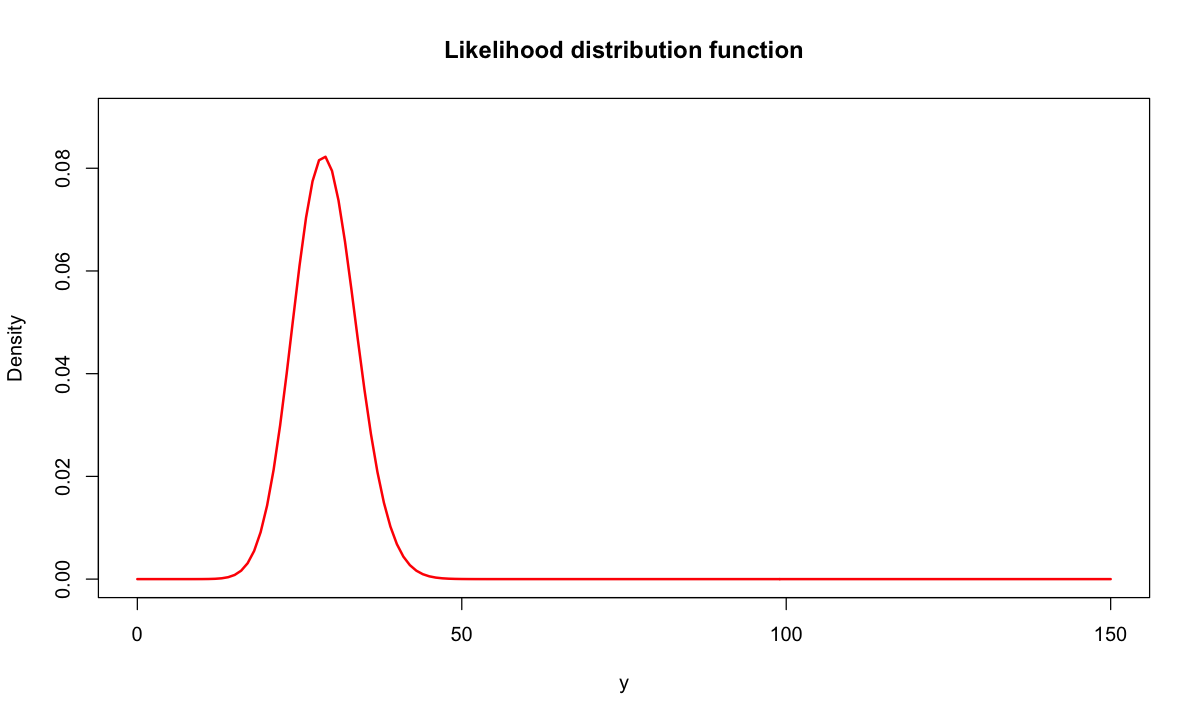

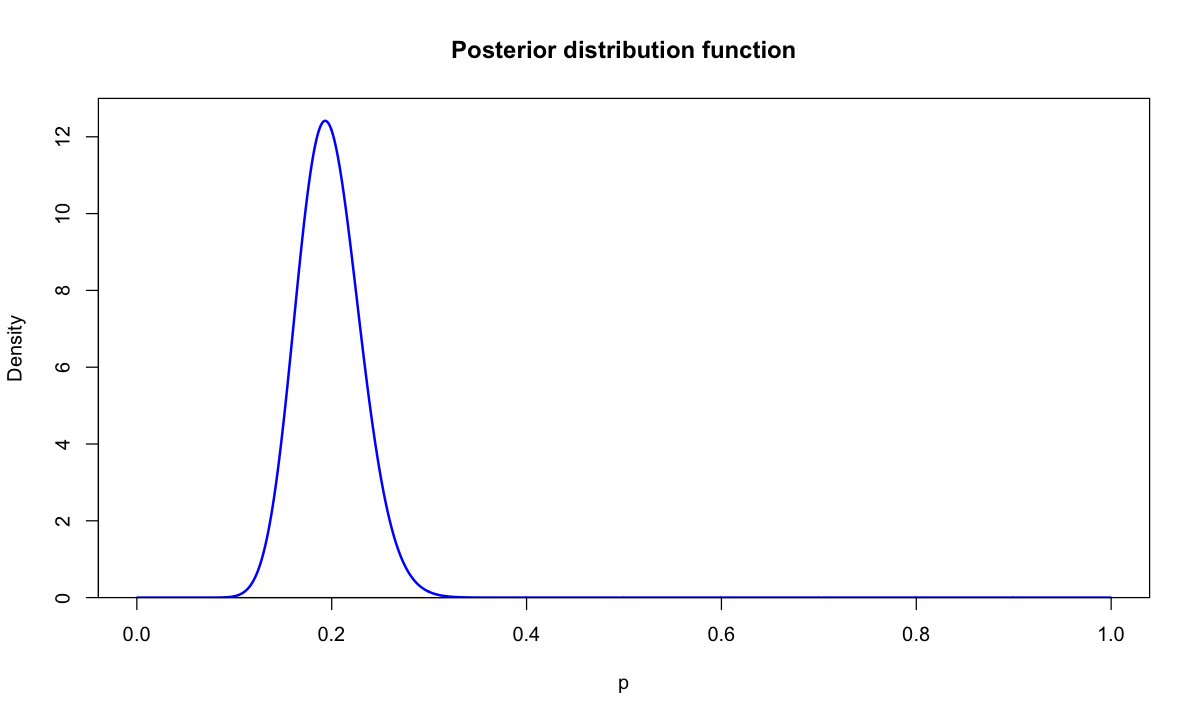

In [2]:
tot = 150 
y = 29

x = seq(0, tot, 1)


Like = dbinom(x=x, size=tot, prob=y/tot)

sample = 1000
deltaP = 1/sample
p = seq(from=1/(2*sample), by=deltaP, length.out=sample)

l_star = dbinom(x=y, size=tot, prob=p)
post = l_star/(deltaP*sum(l_star))


plot(x, Like, xaxs='r',  col='red', type='l', ylim=c(0,0.09),
     main = "Likelihood distribution function", lwd = 2, xlab="y", 
     ylab='Density')


plot(p, post, xaxs='r', yaxs='i', col='blue', type='l', ylim=c(0,13),
     main = "Posterior distribution function", lwd = 2, xlab="p", 
     ylab='Density')




## Exercise 2

In [3]:
mean <- 0.2
sigma <- 0.08 

alpha <-    mean  * (mean*(1-mean)/sigma**2 - 1)
beta  <- (1-mean) * (mean*(1-mean)/sigma**2 - 1)

n <- 2000
delta <- 1/n
p <- seq(from=1/(2*n), by=delta, length.out=n) 

Aprior <- dbeta(x=p, alpha, beta)

# Benny Prior
Bprior <- dunif(x=p)

# Chris Prior
chris <- Vectorize(function(x){
        if(0 <= x & x< 0.1){X <- 20*x}
        if(0.1 <= x & x< 0.3){X <- 2}
        if(0.3 <= x & x< 0.5){X <- 5-10*x}
        if(x >= 0.5){X <- 0}
        return(X)
        })
Cprior <- chris(p)

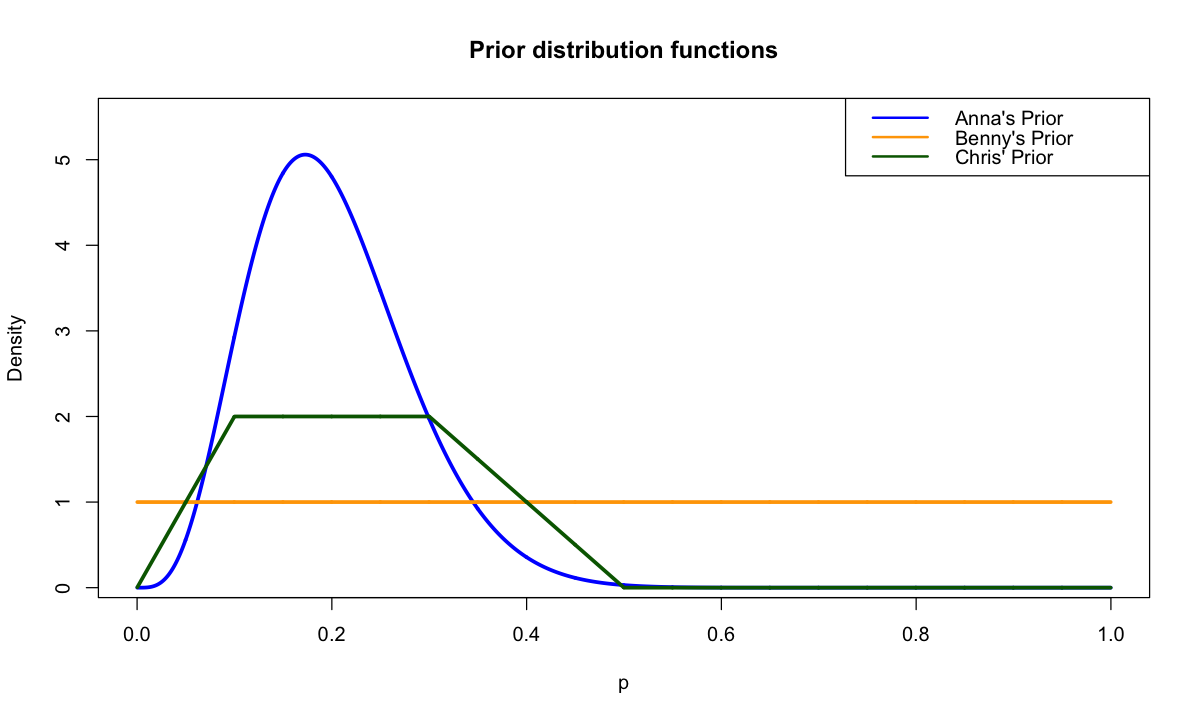

In [4]:
#A)
plot(p, Aprior,  col='blue', type='l', ylim=c(0.1,5.5),
     main = "Prior distribution functions",  lwd = 3, xlab="p", ylab='Density')
lines(p, Bprior, col='orange', type='l',  lwd = 3)
lines(p, Cprior, col='darkgreen', type='l',  lwd = 3)

legend("topright",legend=c("Anna's Prior","Benny's Prior","Chris' Prior"), col=c("blue","orange","darkgreen"),lwd=2:2:2)



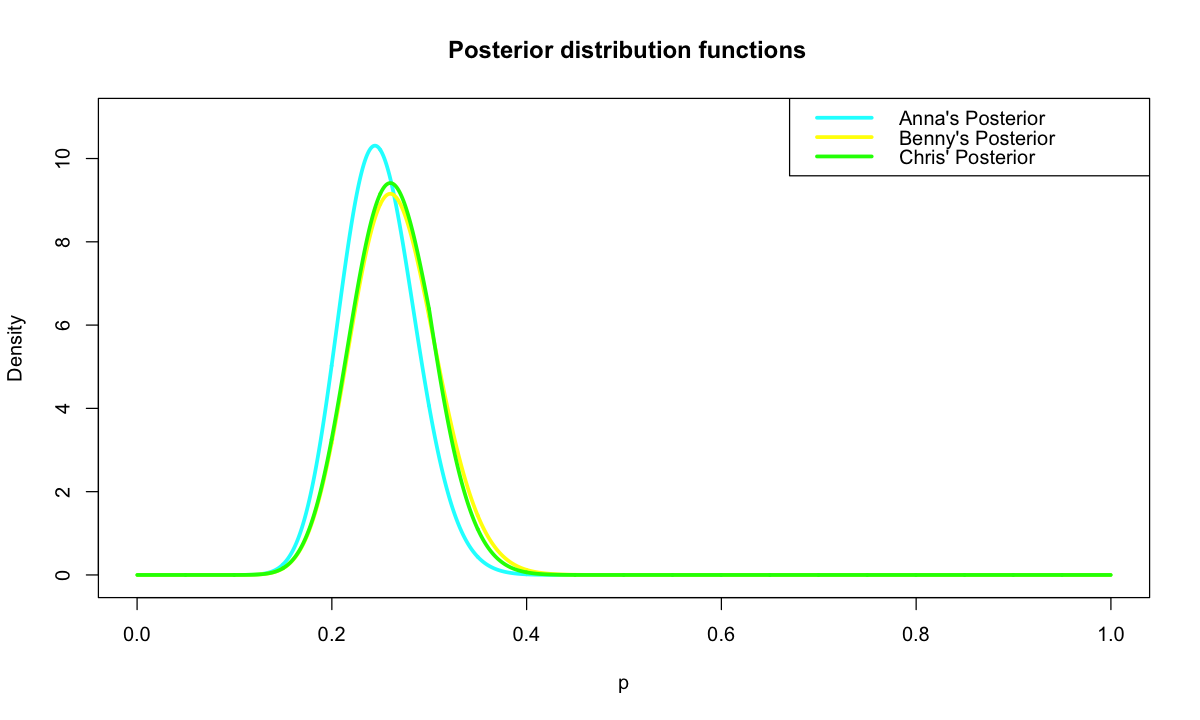

In [5]:
#B)
n <- 100
pos <- 26


p.star <- dbinom(x=pos, size=n, prob=p)*Aprior
Apost <- p.star/(delta*sum(p.star))



p.star <- dbinom(x=pos, size=n, prob=p)*Bprior
Bpost <- p.star/(delta*sum(p.star))



p.star <- dbinom(x=pos, size=n, prob=p)*Cprior
Cpost <- p.star/(delta*sum(p.star))



plot(p, Apost,  col='cyan', type='l', ylim=c(-0.1,11),
     main = " Posterior distribution functions", lwd = 3, xlab="p", 
     ylab='Density')
lines(p, Bpost, col='yellow',  lwd = 3)
lines(p, Cpost, col='green',  lwd = 3)

legend("topright",legend=c("Anna's Posterior","Benny's Posterior","Chris' Posterior"), col=c("cyan","yellow","green"), lwd=3)

In [6]:
# C)
Eanna  <- p[which.max(Apost)]
Ebenny <- p[which.max(Bpost)]
Echris <- p[which.max(Cpost)]

Asum <- delta*cumsum(Apost)
Bsum <- delta*cumsum(Bpost)
Csum <- delta*cumsum(Cpost)

cl <- 0.95 

CLfunc <- function(p,sum,cl) {
            for(i in 1:(length(sum)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+ cl1
                if ( (sum[i+1]>= cl1) & (sum[i] <= cl1)) {
                    x1 <- (p[i]+p[i+1])/2}
                if ( (sum[i+1]>= cl2) & (sum[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2}            
            }
    return(c(x1,x2))}

intA <- CLfunc(p,Asum,cl)
intB <- CLfunc(p,Bsum,cl)
intC <- CLfunc(p,Csum,cl)


cat("Anna's E[x]=  ", Eanna,'with a confidence interval of: [',intA,']\n')
cat("Benny's E[x]= ", Ebenny,'with a confidence interval of: [',intB,']\n')
cat("Chris's E[x]= ", Echris,'with a confidence interval of: [',intC,']')


Anna's E[x]=   0.24425 with a confidence interval of: [ 0.1765 0.3275 ]
Benny's E[x]=  0.26025 with a confidence interval of: [ 0.184 0.354 ]
Chris's E[x]=  0.26025 with a confidence interval of: [ 0.1835 0.346 ]

## Exercise 3

In [7]:
output = c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H',
           'T', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'H', 'T',
           'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H')

N = length(output)
T = length(output[output == 'T']) 


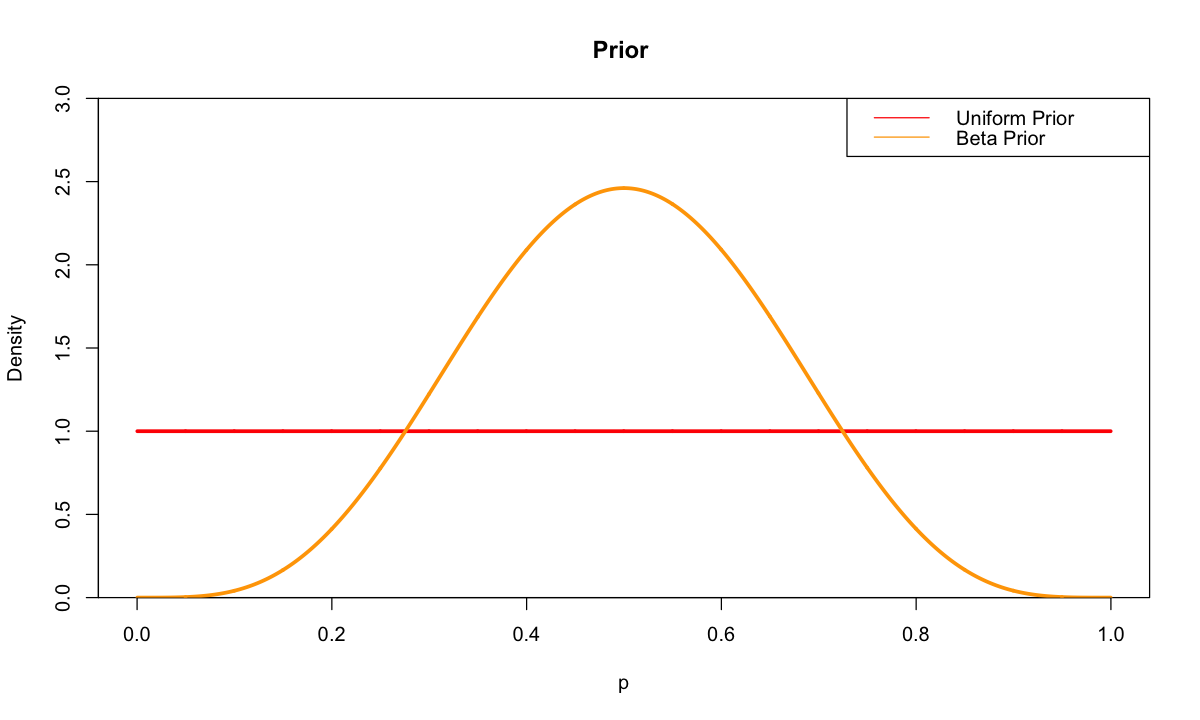

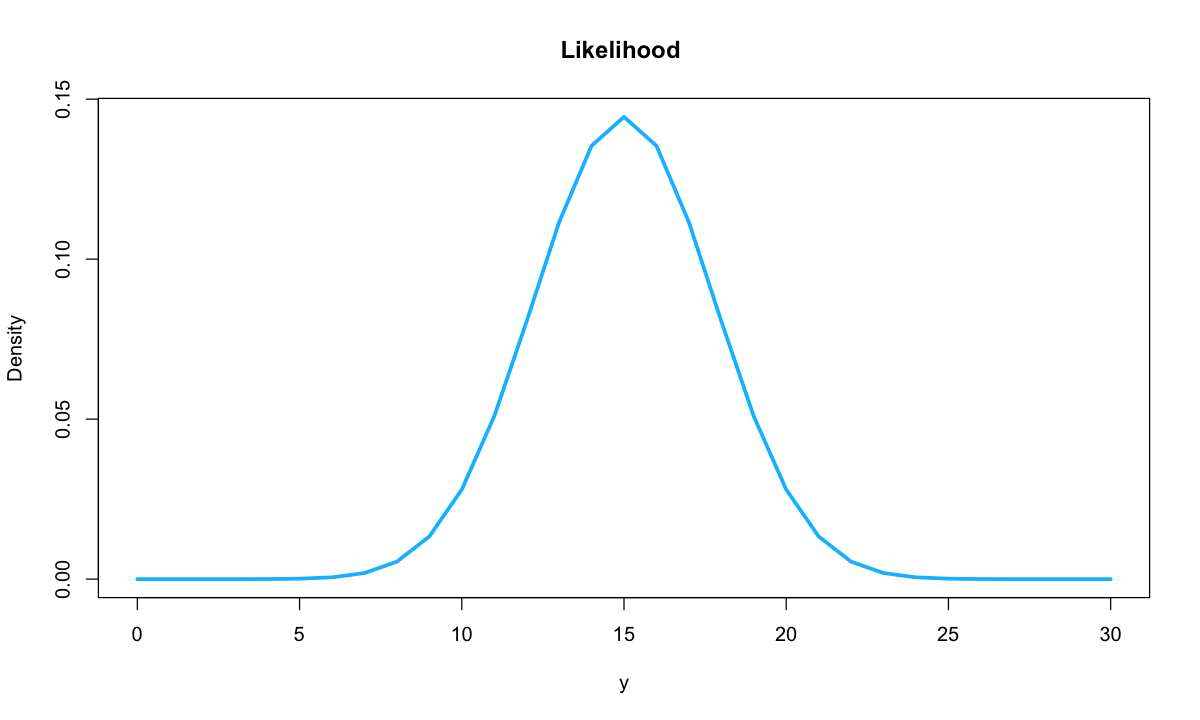

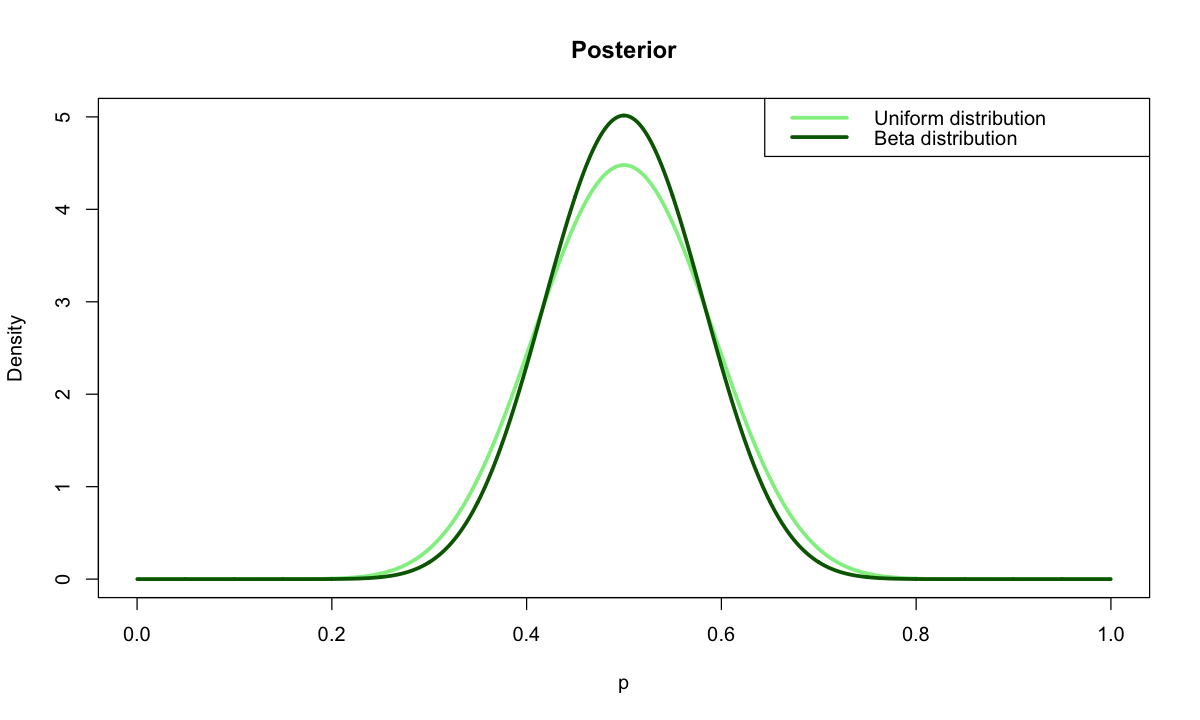

In [8]:
#A)
n <- 2000
delta <- 1/n
p <- seq(from=1/(2*n), by=1/n, length.out=n) 


flat_prior = dunif(x=p)

alpha <- 5
beta <- 5
beta_prior <- dbeta(x=p, alpha, beta)


plot(p, flat_prior, xaxs='r', yaxs='i', col='red', type='l', ylim=c(0,3),
     main = "Prior ", lwd = 3, xlab="p", 
     ylab='Density')
lines(p, beta_prior,  col='orange',  lwd = 3)
legend("topright", legend=c("Uniform Prior","Beta Prior"), col=c("red","orange"), lty=1)


x <- seq(0, N, 1)
Like <- dbinom(x=x, size=N, prob=1/2)


plot(x, Like, col='deepskyblue', type='l', main = "Likelihood ",  
     lwd = 3, xlab="y", ylab='Density')


p_star <- dbinom(x=T, size=N, prob=p)*flat_prior
flat_post <- p_star/(delta*sum(p_star))
beta_post <- dbeta(x=p, alpha+T, beta+N-T)


plot(p, flat_post,  col='lightgreen', type='l', ylim=c(0,5),
     main = "Posterior", lwd = 3, xlab="p", ylab='Density')
lines(p, beta_post,  col='darkgreen', lwd = 3)
legend("topright",legend=c("Uniform distribution","Beta distribution"),
       col=c("lightgreen","darkgreen"),lwd=3:3:3)


In [9]:
#B)

max_flat  = p[which.max(flat_post)]
max_beta = p[which.max(beta_post)]

cat("For Flat Prior, the most probable value of the posterior is:", max_flat,'\n')
cat("For Beta Prior, the most probable value of the posterior is:", max_beta)

flat_area <- delta*cumsum(flat_post)
beta_area <- delta*cumsum(beta_post)
cl <-0.95 # Confidence level

confidence <- function(p,area,cl) {
                cl1 <- (1-cl)/2
                cl2 <- cl+cl1
            for(i in 1:(length(area)-1)){
                if ( (area[i+1]>= cl1) & (area[i] <= cl1)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (area[i+1]>= cl2) & (area[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

x_flat <- confidence(p,flat_area,cl)
x_beta<- confidence(p,beta_area,cl)
cat('\n')
cat('\n')
cat("For a Flat Prior the interval is: [", x_flat[1],',', x_flat[2],']\n')
cat("For a Beta Prior the interval is: [", x_beta[1],',', x_beta[2],']')

For Flat Prior, the most probable value of the posterior is: 0.49975 
For Beta Prior, the most probable value of the posterior is: 0.49975

For a Flat Prior the interval is: [ 0.3305 , 0.669 ]
For a Beta Prior the interval is: [ 0.3475 , 0.652 ]

In [10]:
Nseq <- NULL
Tseq <- NULL
flat_prior.seq <- 1
beta_prior.seq <- 1
max_flat.seq <- NULL
max_beta.seq <- NULL
x1_flat.seq <- NULL
x2_flat.seq <- NULL
x1_beta.seq <- NULL
x2_beta.seq <- NULL

for (i in 1:N){
        
        outIt <- output[1:i]
        nIt <- length(outIt)    
        TIt <- length(outIt[outIt == 'T'])
        T <- ifelse(output[i]=='T',1, 0) 
        
        Nseq <- c(Nseq,nIt)
        Tseq <- c(Tseq,TIt)

        flat_prior <- flat_prior.seq*dunif(x=p)
                
        alpha <- 5
        beta <- 5
        beta_prior <- beta_prior.seq*dbeta(x=p, alpha, beta)
        
        p.star <- dbinom(x=T, size=1, prob=p)*flat_prior
        flat_post <- p.star/(delta*sum(p.star))
        flat_prior.seq <- flat_post
    
        beta_post <- dbeta(x=p, alpha+TIt, beta+nIt-TIt)
        beta_prior.seq <- beta_post
    

        max_flat  <- p[which.max(flat_post)]
        max_beta <- p[which.max(beta_post)]
        max_flat.seq <- c(max_flat.seq,max_flat)
        max_beta.seq <- c(max_beta.seq,max_beta)
        flat_area <- delta*cumsum(flat_post)
        beta_area <- delta*cumsum(beta_post)
        x_flat <- confidence(p,flat_area,cl)
        x_beta <- confidence(p,beta_area,cl)
        x1_flat.seq <- c(x1_flat.seq,x_flat[1])
        x2_flat.seq <- c(x2_flat.seq,x_flat[2])
        x1_beta.seq <- c(x1_beta.seq,x_beta[1])
        x2_beta.seq <- c(x2_beta.seq,x_beta[2])
}

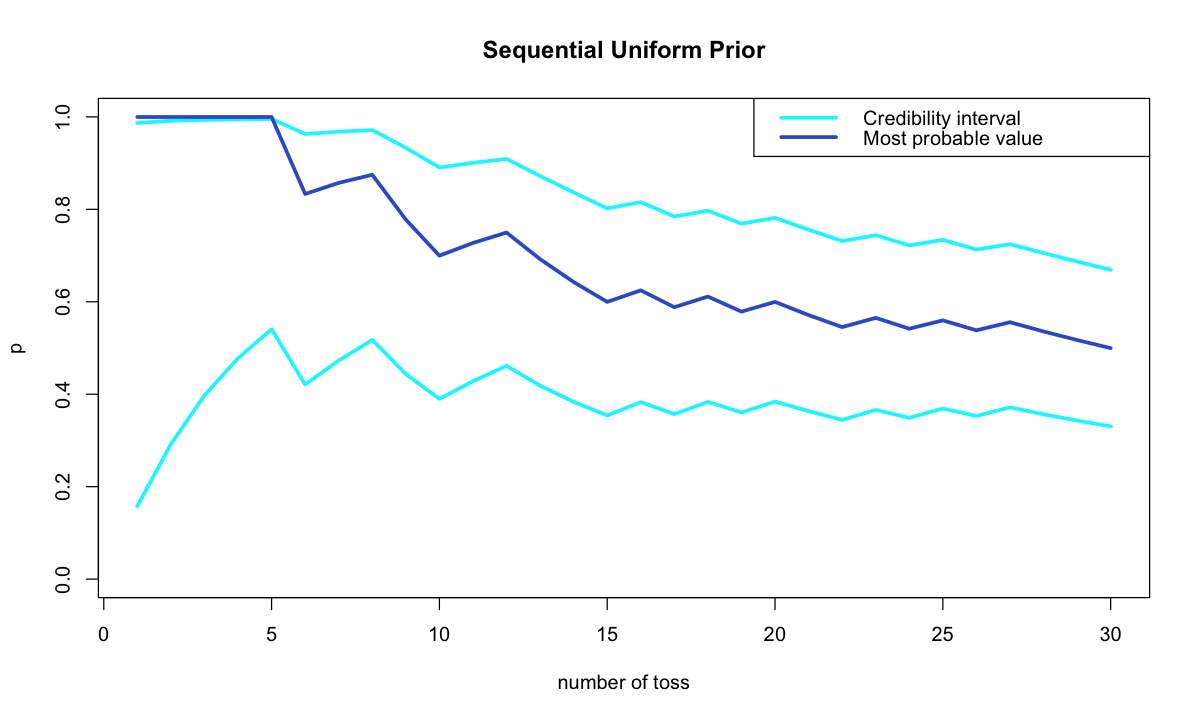

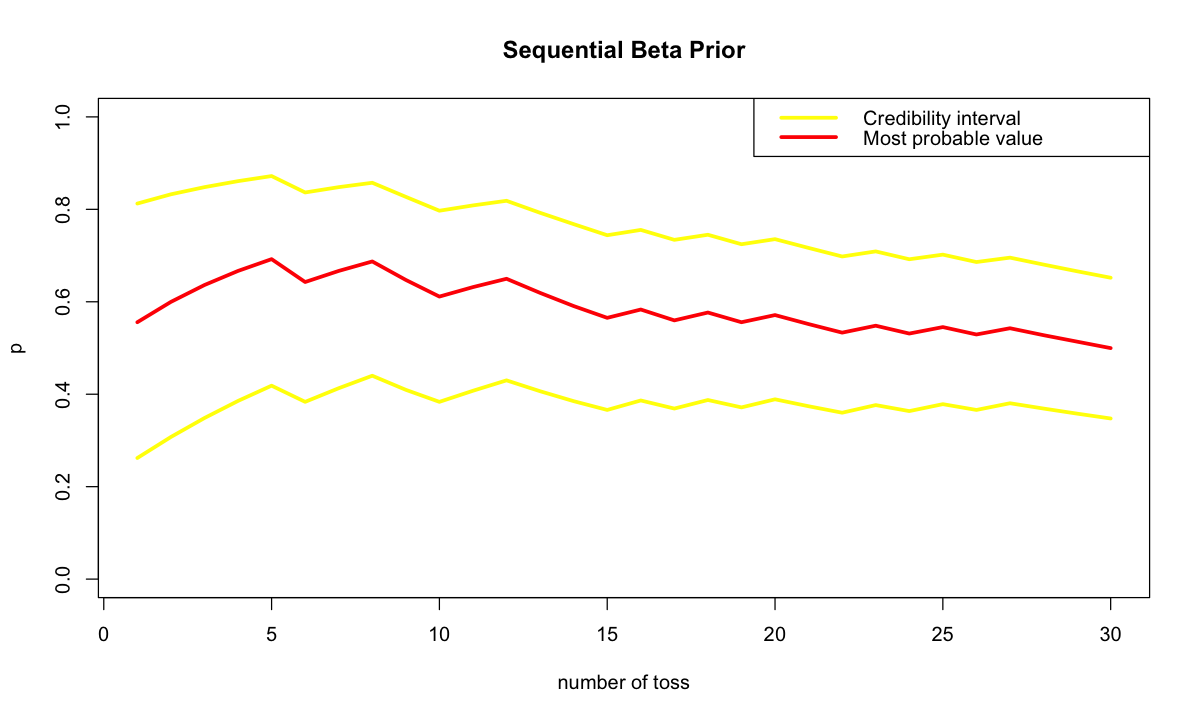

In [11]:

plot(Nseq, x1_flat.seq,  col='turquoise1', ylim=c(0,1),type='l',main = paste("Sequential Uniform Prior"), lwd = 3, xlab="number of toss", ylab='p')
lines(Nseq, x2_flat.seq, col='turquoise1', lwd = 3)
lines(Nseq, max_flat.seq, col='royalblue3', type='l',lwd = 3)
legend("topright",legend=c("Credibility interval","Most probable value"),col=c("turquoise1","royalblue3"),lwd=3)



plot(Nseq, x1_beta.seq, col='yellow', type='l', ylim=c(0,1),main = paste("Sequential Beta Prior"),  lwd = 3, xlab="number of toss", ylab='p')
lines(Nseq, x2_beta.seq, col='yellow', type='l', lty=1, lwd = 3)
lines(Nseq, max_beta.seq, col='red', type='l', lty=1, lwd = 3)
legend("topright", legend=c("Credibility interval","Most probable value"), col=c("yellow","red"), lwd=3)


## D)  
As expected, with the two methods we obtained the same final results because each coin toss is independent from the others.